<a href="https://colab.research.google.com/github/merriekay/CS167Code/blob/main/Day16_Notes_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/irisData.csv')

Mounted at /content/drive


In [3]:
#create dummy variables for species in Iris data
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
iris_dummies[0:10]

,sepal length,sepal width,petal length,petal width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
5,5.4,3.9,1.7,0.4,1,0,0
6,4.6,3.4,1.4,0.3,1,0,0
7,5.0,3.4,1.5,0.2,1,0,0
8,4.4,2.9,1.4,0.2,1,0,0
9,4.9,3.1,1.5,0.1,1,0,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics


#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")


predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
#target = "species_Iris-virginica"
#target = "species_Iris-setosa"
target = "species_Iris-versicolor"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
iris_perc_predictions = perc.predict(test_data)

#output accuracy
print("Setosa accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))

Setosa accuracy: 0.6333333333333333


In [6]:
#Boston Housing Data

from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/boston_housing.csv') 
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


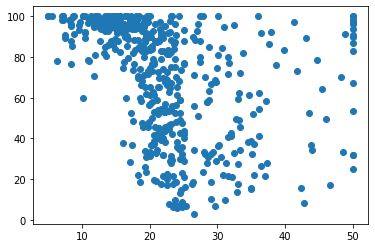

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data['MEDV'],data['AGE'])
plt.show()

In [8]:
predictors = data.columns.drop('MEDV')
target = 'MEDV'

In [9]:
#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDRegressor

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
sgd = SGDRegressor()
sgd.fit(train_data,train_sln)
medv_sgd_predictions = sgd.predict(test_data)

#output accuracy
print("SGD Regression R2:", metrics.r2_score(test_sln, medv_sgd_predictions))
print("SGD Regression MAE:", metrics.mean_absolute_error(test_sln, medv_sgd_predictions))
print("SGD Regression MSE:", metrics.mean_squared_error(test_sln, medv_sgd_predictions))

SGD Regression R2: -3.4278149347662726e+24
SGD Regression MAE: 10898740811953.453
SGD Regression MSE: 1.5915661034155312e+26


In [10]:
#Guessing that the huge error comes from not normalizing the data:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

#load up scikit-learn Perceptron
sgd = SGDRegressor()
sgd.fit(train_data_normalized,train_sln)
medv_sgd_predictions = sgd.predict(test_data_normalized)

#output accuracy
print("SGD Regression R2:", metrics.r2_score(test_sln, medv_sgd_predictions))
print("SGD Regression MAE:", metrics.mean_absolute_error(test_sln, medv_sgd_predictions))
print("SGD Regression MSE:", metrics.mean_squared_error(test_sln, medv_sgd_predictions))

SGD Regression R2: 0.5126036173111206
SGD Regression MAE: 3.4258847850261116
SGD Regression MSE: 22.63026377962432


In [11]:
sgd = SGDRegressor(learning_rate="constant", eta0=0.000001, max_iter=10000000)
sgd.fit(train_data, train_sln)

pred = sgd.predict(test_data)

print("SGD Regression R2:", metrics.r2_score(test_sln, pred))
print("SGD Regression MAE:", metrics.mean_absolute_error(test_sln, pred))
print("SGD Regression MSE:", metrics.mean_squared_error(test_sln, pred))

SGD Regression R2: -0.22127206908436103
SGD Regression MAE: 6.051795061377717
SGD Regression MSE: 56.70478906222965


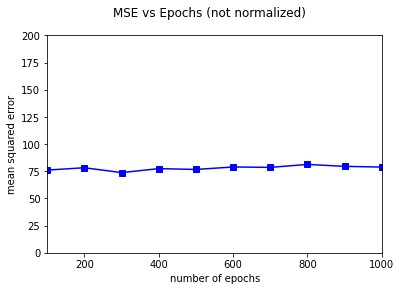

In [12]:

# read in the data
data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/boston_housing.csv') 
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']
target = "MEDV"

#create training and testing data
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)


#regression_SGD performs Stochastic Gradient Descent
#input: training data, testing, data, traing solution, testing solutions, # of epochs
#return: the mean squared error
def regression_SGD(train, test, train_sln, test_sln, epochs):
    sgd = SGDRegressor(eta0=0.000001, max_iter=epochs)
    sgd.fit(train, train_sln)
    predictions = sgd.predict(test)
    mse = metrics.mean_squared_error(test_sln,predictions)
    return mse

# run the data over this range of epochs 1 through 10
epoch_list = range(100, 1001, 100)
epoch_accuracies = []

for epoch in epoch_list:
    r = regression_SGD(train_data, test_data, train_sln, test_sln, epoch)
    epoch_accuracies.append(r)
    
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Epochs (not normalized)',fontsize=12)
plt.xlabel('number of epochs')
plt.ylabel('mean squared error')
plt.plot(epoch_list,epoch_accuracies,'bs-')

plt.axis([100,1001,0,200])

plt.show()

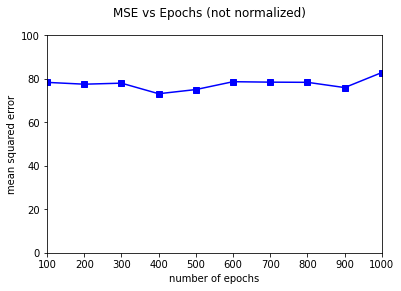

In [13]:

# read in the data
data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/boston_housing.csv') 
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']
target = "MEDV"

#create training and testing data
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)


#regression_SGD performs Stochastic Gradient Descent
#input: training data, testing, data, traing solution, testing solutions, # of epochs
#return: the mean squared error
def regression_SGD(train, test, train_sln, test_sln, epochs):
    sgd = SGDRegressor(eta0=0.000001, max_iter=epochs)
    sgd.fit(train, train_sln)
    predictions = sgd.predict(test)
    mse = metrics.mean_squared_error(test_sln,predictions)
    return mse

# run the data over this range of epochs 1 through 10
epoch_list = range(100,1001,100)
epoch_accuracies = []

for epoch in epoch_list:
    r = regression_SGD(train_data, test_data, train_sln, test_sln, epoch)
    epoch_accuracies.append(r)
    
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Epochs (not normalized)',fontsize=12)
plt.xlabel('number of epochs')
plt.ylabel('mean squared error')
plt.plot(epoch_list,epoch_accuracies,'bs-')

plt.axis([100,1000,0,100])

plt.show()

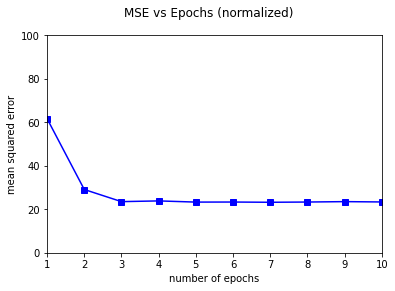

In [14]:
# read in the data
data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/boston_housing.csv') 
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']
target = "MEDV"

#create training and testing data
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

#regression_SGD performs Stochastic Gradient Descent
#input: training data, testing, data, traing solution, testing solutions, # of epochs
#return: the mean squared error
def regression_SGD(train, test, train_sln, test_sln, epochs):
    sgd = SGDRegressor(max_iter=epochs)
    sgd.fit(train, train_sln)
    predictions = sgd.predict(test)
    mse = metrics.mean_squared_error(test_sln,predictions)
    return mse

# run the data over this range of epochs 1 through 10
epoch_list = range(1, 11)
epoch_accuracies = []

for epoch in epoch_list:
    r = regression_SGD(train_data_normalized, test_data_normalized, train_sln, test_sln, epoch)
    epoch_accuracies.append(r)

# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Epochs (normalized)',fontsize=12)
plt.xlabel('number of epochs')
plt.ylabel('mean squared error')
plt.plot(epoch_list,epoch_accuracies,'bs-')

plt.axis([1,10,0,100])

plt.show()